In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
import data_utils as t
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
%matplotlib inline

# Cross Industry Standard Process for Data Mining (CRISP-DM)
To Understand our data and prepare for further analysis we need to perform CRISP-DM in following steps:
* Business Understanding
* Data Understanding
* Prepare Data
* Data Modeling
* Evaluate the Results

In [2]:
df = pd.read_csv('../data/survey_results_public_2020.csv')
df.drop(columns=['Respondent'], inplace=True)
schema = pd.read_csv('../data/survey_results_schema_2020.csv')

## Business Understanding
* data contains information about survery by Stackoverflow in the year 2020
* there are mutiple choice, single choice, and user input answers
* list of questions can be seen below

In [3]:
display(schema.QuestionText)

0     Randomized respondent ID number (not in order ...
1     Which of the following options best describes ...
2                               Do you code as a hobby?
3     What is your age (in years)? If you prefer not...
4     At what age did you write your first line of c...
                            ...                        
56    Which web frameworks have you done extensive d...
57    Compared to last year, how welcome do you feel...
58    On average, how many hours per week do you wor...
59    Including any education, how many years have y...
60    NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

## Data Understanding
after loading data lets have look at it content in order to undersand content. following steps can help us:
* number of features and samples
* summery of numerical data
* histogram plot of the numerical data
* overview of metadata
* overview of categorical data

In [4]:
df.head()

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [5]:
print()
print("#features: {}, #samples:{}".format(df.shape[1],df.shape[0]))
cat_fts= df.select_dtypes(include=['object'])
print()
print("#numerical features: {}, #categorical features:{}".format(df.shape[1]-cat_fts.shape[1],cat_fts.shape[1]))
print()



#features: 60, #samples:64461

#numerical features: 4, #categorical features:56



#### Missing values per column and row
* the bar plot shows there many features such *salary*(CompTotal) which contain more that 40% missing values 
* looking at left skewed histigram we see there still many rows which are missing more than 40% of their values

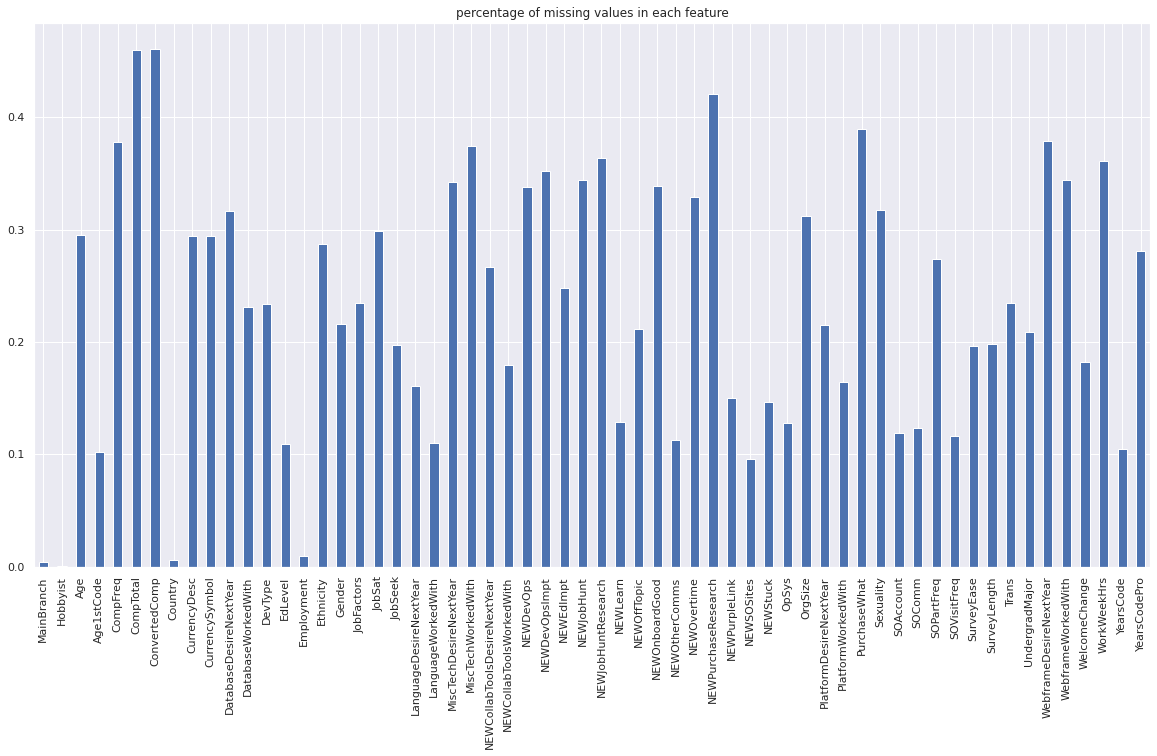

In [6]:
df.isna().mean().plot(kind='bar',figsize=(20,10), title="percentage of missing values in each feature");

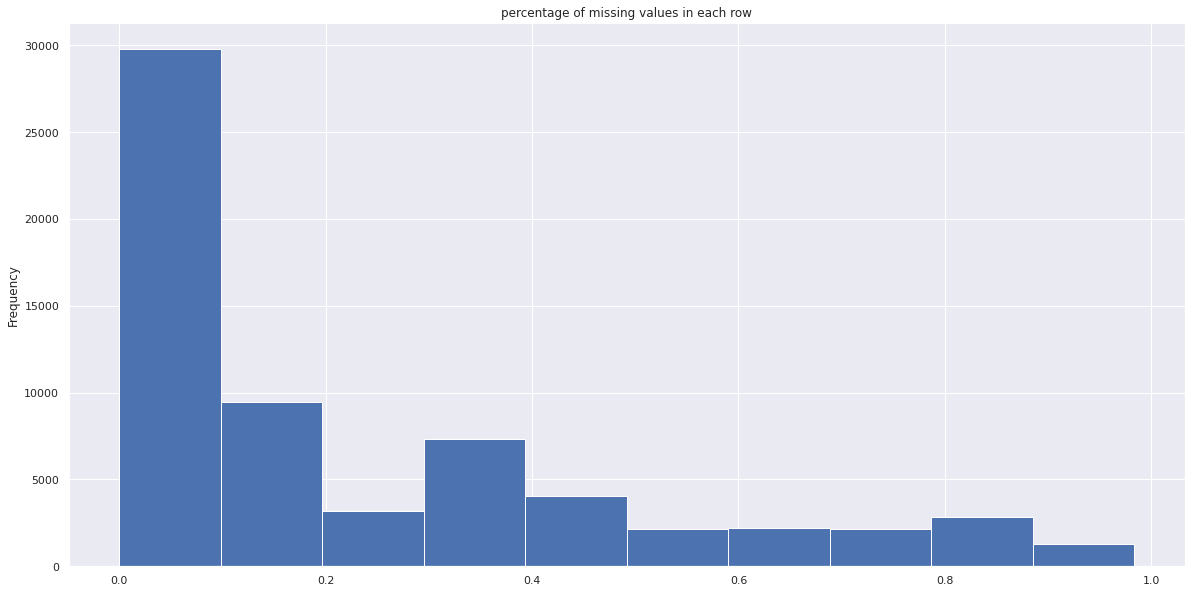

In [7]:
df.isna().mean(axis=1).plot(kind='hist',figsize=(20,10), title="percentage of missing values in each row");

,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,30.834111,3.190464e+242,1.037561e+05,40.782174
std,9.585392,inf,2.268853e+05,17.816383
min,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,35.000000,1.250000e+05,9.500000e+04,44.000000
max,279.000000,1.111111e+247,2.000000e+06,475.000000


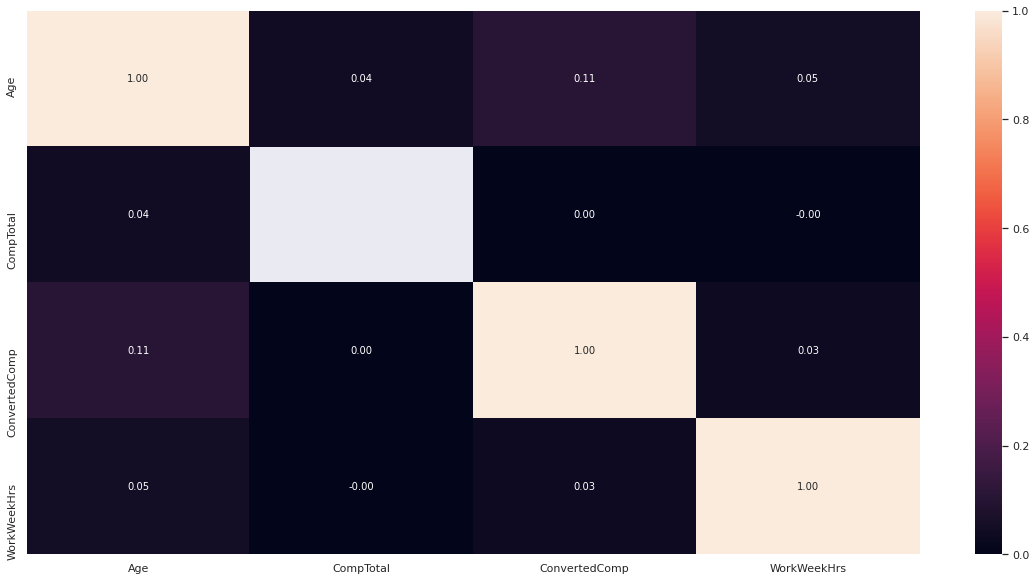

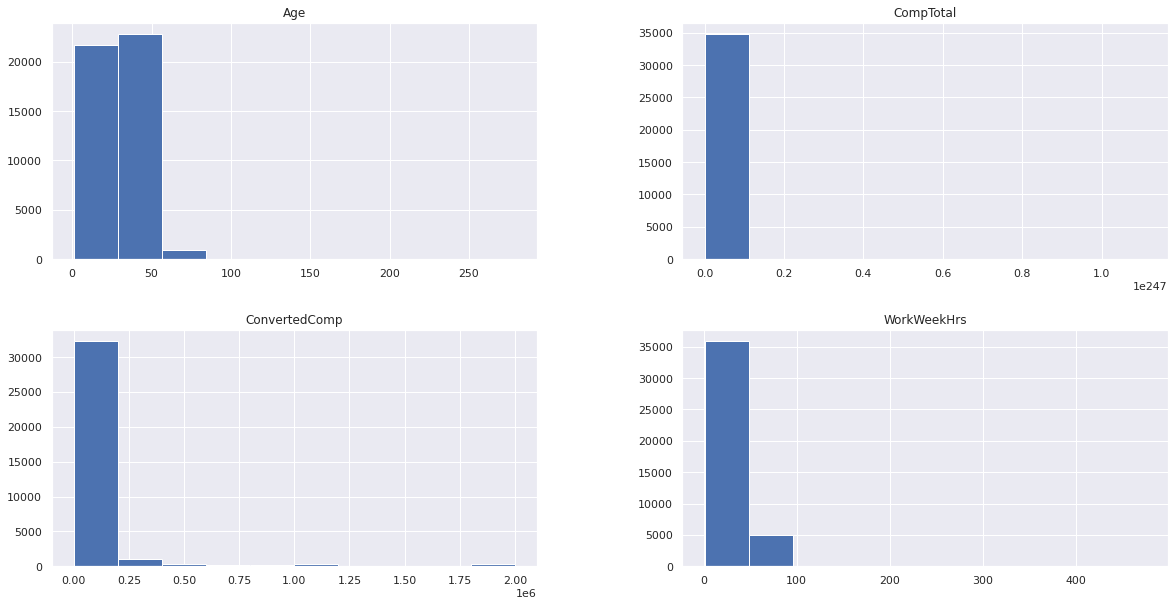

In [8]:
plt.figure(figsize=(20, 10))

sns.heatmap(df.corr(), annot=True, fmt='0.2f');
df.hist(figsize=(20,10));
df.describe()

## Prepare Data
In order to prepare our dataset for further analysis we will perforce the following steps
* dealing with missing data
    * deletion
    * imputation with mean
* dealing with dummy variables
* standardization 

In [9]:
## replace special string values in a numerical column
# some manual correction just by looking at the data value counts
df.YearsCodePro = t.replace_special_str_with_number(df.YearsCodePro, special_strs={'Less than 1 year': 0.5, 'More than 50 years':51})
df.YearsCode = t.replace_special_str_with_number(df.YearsCode, special_strs={'Less than 1 year': 0.5, 'More than 50 years':51})
df.Age1stCode = t.replace_special_str_with_number(df.Age1stCode, special_strs={'Younger than 5 years': 4, 'Older than 85':86})

In [27]:
# imopute numerical columns with mean
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = df.select_dtypes(include=numerics).columns
df[num_cols] = df[num_cols].apply(t.impute_with_mean)
df[num_cols].describe()

,Age,Age1stCode,CompTotal,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro
count,64461.000000,64461.000000,6.446100e+04,6.446100e+04,64461.000000,64461.000000,64461.000000
mean,30.883046,15.368579,3.190464e+242,1.037560e+05,40.864042,12.739641,8.634601
std,8.048774,5.017864,inf,1.665980e+05,14.234847,9.192788,6.707188
min,1.000000,4.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
25%,26.000000,13.000000,5.600000e+04,4.916000e+04,40.000000,6.000000,4.000000
50%,31.000000,15.000000,7.200000e+05,1.037560e+05,41.000000,11.000000,9.000000
75%,32.000000,18.000000,3.190464e+242,1.037560e+05,41.000000,16.000000,9.000000
max,279.000000,86.000000,1.111111e+247,2.000000e+06,475.000000,51.000000,51.000000


In [16]:
# create dummy variables and remove variables with more than 80% zeros
df_dm = t.create_dummy_df(df.copy(), 0.20);

/media/ramzo/home-disk/ramin/ramin-personal-projects/z-Udacity-course/data-science-term-2/ml-blog-project/stackoverflow_survey_analysis/src/data_utils.py:310: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(col + '_' + s).replace(" ", "")][i] = 1
/media/ramzo/home-disk/ramin/ramin-personal-projects/z-Udacity-course/data-science-term-2/ml-blog-project/stackoverflow_survey_analysis/src/data_utils.py:312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(col + '_' + str(j)).replace(" ", "")][i] = 1


In [26]:
df_dm.describe()

,Age,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro,MainBranch_Iamadeveloperbyprofession,Hobbyist_Yes,Hobbyist_No,CompFreq_nan,...,Trans_No,UndergradMajor_nan,"UndergradMajor_Computerscience,computerengineering,orsoftwareengineering",WebframeDesireNextYear_nan,WebframeDesireNextYear_React.js,WebframeDesireNextYear_Vue.js,WebframeWorkedWith_nan,WebframeWorkedWith_jQuery,WebframeWorkedWith_React.js,WelcomeChange_JustaswelcomenowasIfeltlastyear
count,64461.000000,64461.000000,6.446100e+04,64461.000000,64461.000000,64461.000000,64461.000000,64461.000000,64461.000000,64461.000000,...,64461.000000,64461.000000,64461.000000,64461.000000,64461.000000,64461.000000,64461.000000,64461.000000,64461.000000,64461.000000
mean,30.883046,15.368579,1.037560e+05,40.864042,12.739641,8.634601,0.732117,0.781682,0.217620,0.378399,...,0.758148,0.208902,0.489940,0.379097,0.311367,0.203875,0.344115,0.284141,0.235290,0.577109
std,8.048774,5.017864,1.665980e+05,14.234847,9.192788,6.707188,0.442860,0.413108,0.412631,0.484992,...,0.428208,0.406527,0.499903,0.485166,0.463056,0.402880,0.475083,0.451008,0.424183,0.494022
min,1.000000,4.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,13.000000,4.916000e+04,40.000000,6.000000,4.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,15.000000,1.037560e+05,41.000000,11.000000,9.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,32.000000,18.000000,1.037560e+05,41.000000,16.000000,9.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,279.000000,86.000000,2.000000e+06,475.000000,51.000000,51.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


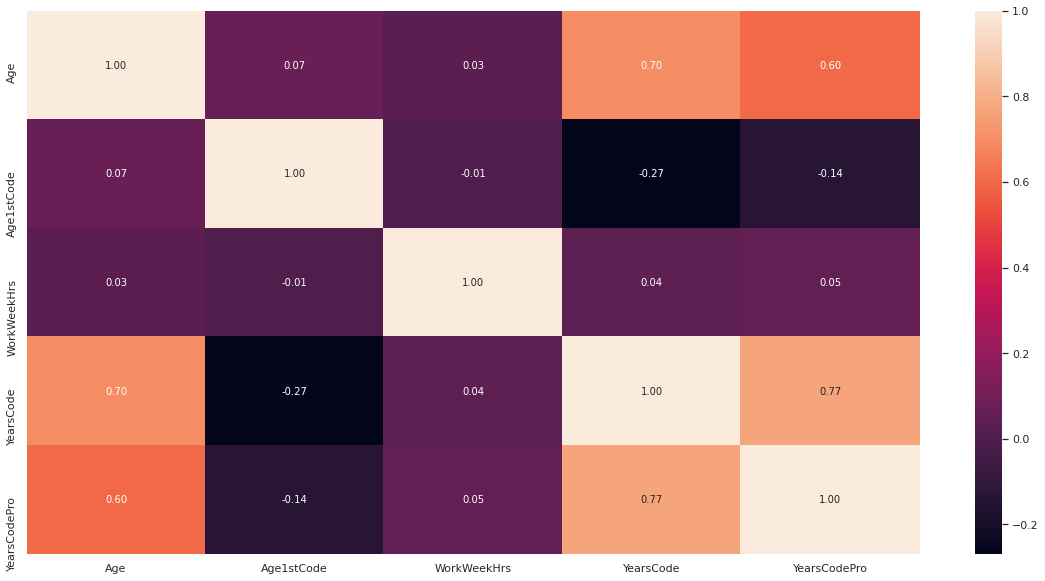

In [21]:
# in this stage we apply standard scaler only and numerical data and split it to train and test sets
num_cols = ['Age', 'Age1stCode', 'ConvertedComp', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']
Xnc, ync, xnc_train, xnc_test, ync_train, ync_test = t.split_data_to_train_test(df[num_cols],'ConvertedComp')
plt.figure(figsize=(20, 10))
sns.heatmap(xnc_train.corr(), annot=True, fmt='0.2f');
xnc_train, xnc_test = t.apply_standard_scaler(xnc_train, xnc_test)

In [28]:
# We do the same for all columns including those generated from dummy variable and imputed
df_dm.drop(columns=['CompTotal'], inplace=True)
Xdm, ydm, xdm_train, xdm_test, ydm_train, ydm_test = t.split_data_to_train_test(df_dm,'ConvertedComp')
xdm_train, xdm_test = t.apply_standard_scaler(xdm_train, xdm_test)

## Data Modeling 
* predict salary(ConvertedComp) using cleaned up numerical fields
* predict salray(ConvertedComp) using all fields after cleaning dummies and missing values
* fit a linear regression model 
* compare results of training with mode dataset and look for changes and improvements

In [18]:
test_score, train_score, lm_model = t.train_linear_model(xnc_train, ync_train, xnc_test, ync_test);
print('test_score:{}, train_score:{},'.format(test_score, train_score))

test_score:0.01121207140541347, train_score:0.010307688320003061,


In [19]:
test_score, train_score, lm_model = t.train_linear_model(xdm_train, ydm_train, xdm_test, ydm_test);
print('test_score:{}, train_score:{},'.format(test_score, train_score))

test_score:0.13922291234079476, train_score:0.1321060637046355,


## Evaluate the Results
* fitted model with numerical variables does a pure job in predicting salary
* there is small performane gain in the model using all possible vairables including dummy variables